# Optim Module

In [1]:
"""
@author: Yossi Shor
"""
# importing the optim module
import numpy as np
import torch
from torch import optim

# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)
# sgd
## SGD = optim.SGD(model.parameters(), lr=learning_rate)

In [2]:
#Input tensor
X = torch.Tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y = torch.Tensor([[1],[1],[0]])

print(X, '\n')
print(y)

tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]]) 

tensor([[1.],
        [1.],
        [0.]])


In [3]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + torch.exp(-x))

#Derivative of Sigmoid Function/
def derivatives_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
#Variable initialization

epoch = 7000 #Setting training iterations
lr = 0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layer neurons
output_neurons = 1 #number of neurons in output layer

#weight and bias initialization

wh = torch.randn(inputlayer_neurons, hiddenlayer_neurons).type(torch.FloatTensor)
bh =torch.randn(1, hiddenlayer_neurons).type(torch.FloatTensor)
wout = torch.randn(hiddenlayer_neurons, output_neurons)
bout = torch.randn(1, output_neurons)

In [5]:
for i in range(epoch):    
    
    #Forward Propogation
    
    hidden_layer_input1 = torch.mm(X, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hidden_layer_activations = sigmoid(hidden_layer_input)
    output_layer_input1 = torch.mm(hidden_layer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)

    #Backpropagation

    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = torch.mm(d_output, wout.t())
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += torch.mm(hidden_layer_activations.t(), d_output) * lr
    bout += d_output.sum() * lr
    wh += torch.mm(X.t(), d_hiddenlayer) * lr
    bh += d_output.sum() * lr

In [6]:
# look at the output from the model
print('actual :\n', y, '\n')
print('predicted :\n', output)

actual :
 tensor([5, 7, 4,  ..., 6, 8, 0], dtype=torch.uint8) 

predicted :
 tensor([[0.9991],
        [0.9904],
        [0.0148]])


# Solving an Image Classification Problem using PyTorch

# Loading the data

In [7]:
# importing the libraries

import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from keras.datasets import fashion_mnist
%matplotlib inline

In [8]:
# loading dataset from keras.datasets

((train_images, train_labels), (test_images, test_labels)) = fashion_mnist.load_data()

In [9]:
seed = 128
rng = np.random.RandomState(seed)

(60000, 28, 28)

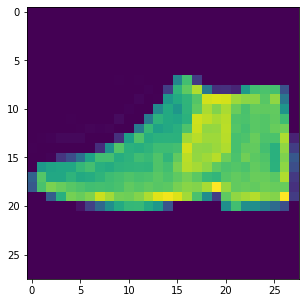

In [10]:
# print an image

img = train_images[np.random.randint(0, len(train_images))]
plt.figure(figsize = (5, 5))
plt.imshow(img)
#plt.imshow(img, cmap = 'gray')

train_images.shape

In [12]:
# create validation set

train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, test_size = 0.1)
train_x, val_x = train_x / train_x.max(), val_x / val_x.max()
train_x = train_x.reshape(-1, 28 * 28).astype('float32')
val_x = val_x.reshape(-1, 28 * 28).astype('float32')
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((54000, 784), (54000,)), ((6000, 784), (6000,)))

In [14]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Sigmoid
from torch.optim import Adam

In [15]:
# number of neurons in each layer

input_num_units = 28 * 28
hidden_num_units = 500
output_num_units = 10

# set remaining variables
epochs = 20
learning_rate = 0.0005

In [16]:
# define model

model = Sequential(Linear(input_num_units, hidden_num_units),
                   ReLU(),
                   Linear(hidden_num_units, output_num_units))

# loss function

loss_fn = CrossEntropyLoss()

# define optimization algorithm

optimizer = Adam(model.parameters(), lr = learning_rate)

In [17]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    avg_cost = 0
    x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad = False)
    x_val, y_val = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad = False)
    pred = model(x)
    pred_val = model(x_val)

    # get loss

    loss = loss_fn(pred, y.long())
    loss_val = loss_fn(pred_val, y_val.long())
    train_losses.append(loss)
    val_losses.append(loss_val)

    # perform backpropagation
    loss.backward()
    optimizer.step()
    avg_cost = avg_cost + loss.data

    if (epoch % 2 != 0):
        print(epoch + 1, avg_cost)

2 tensor(2.1820)
4 tensor(1.9771)
6 tensor(1.8065)
8 tensor(1.6411)
10 tensor(1.4843)
12 tensor(1.3438)
14 tensor(1.2203)
16 tensor(1.1133)
18 tensor(1.0317)
20 tensor(0.9838)


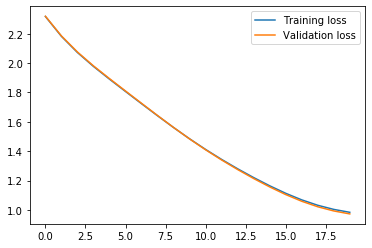

In [18]:
# plotting the training and validation loss

plt.plot(train_losses, label = 'Training loss')
plt.plot(val_losses, label = 'Validation loss')
plt.legend()
plt.show()

In [19]:
# get training accuracy

x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad = False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis = 1)
accuracy_score(train_y, final_pred)

0.6496111111111111

In [21]:
# get validation accuracy

x, y = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad = False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis = 1)
accuracy_score(val_y, final_pred)

0.6476666666666666

In [23]:
# loading test images
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [25]:
# converting the images to 1-D

test_x = test_images / test_images.max()
test_x = test_x.reshape(-1, 28 * 28).astype('float32')
test_x.shape

(10000, 784)

In [27]:
train_images.max()

255

In [29]:
# getting the prediction for test images
prediction = np.argmax(model(torch.from_numpy(test_x)).data.numpy(), axis = 1)

In [30]:
# get an accuracy for prediction
accuracy_score(test_labels, prediction)

0.6405